In [5]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('C:\\Users\\Ольга\\Downloads\\water.csv')
df

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


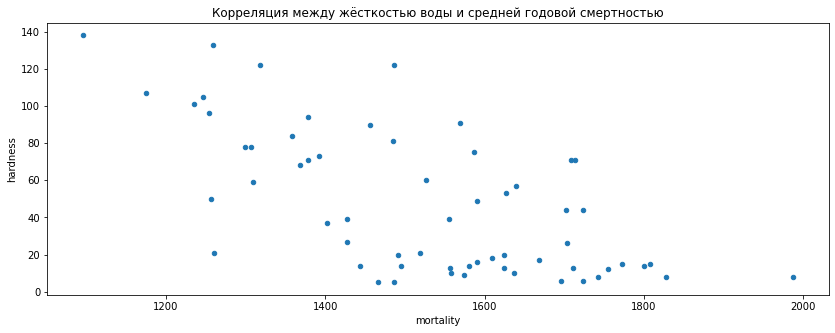

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 14,5
df.plot(kind='scatter', 
        x='mortality', 
        y='hardness', 
        title='Корреляция между жёсткостью воды и средней годовой смертностью')
plt.show()

In [9]:
#Рассчитать коэффициенты корреляции Пирсона и Спирмена

In [10]:
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [11]:
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [12]:
df[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


In [13]:
#Отрицательная корреляция – корреляция, при которой увеличение смертности связано с уменьшением жёсткостью воды, 
#Наличие противоположной связи: чем выше значение одной переменной, тем ниже значение другой.
#По Спирмену средняя корреляция, по Кендаллу слабая корреляция 

In [14]:
#Построить модель линейной регрессии

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [16]:
X = df[['mortality']]
y = df['hardness']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [18]:
X_train.shape

(51, 1)

In [19]:
y_train.shape

(51,)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
model.coef_

array([-0.12305077])

In [22]:
model.intercept_

234.65201362750588

In [23]:
y_pred = model.predict(X_test)
y_pred

array([81.2077074 , 42.93891892, 50.69111723, 25.2196085 , 73.8246614 ,
       34.69451755, 79.7310982 , 39.37044669, 47.73789883, 25.9579131 ])

In [24]:
#Рассчитать коэффициент детерминации

In [25]:
model.score(X_test, y_test)

0.5089565409532293

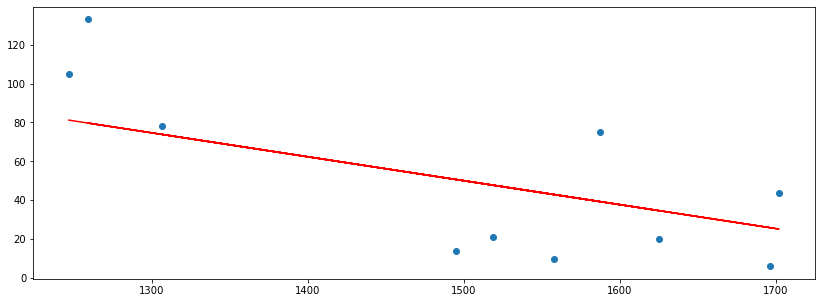

In [26]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

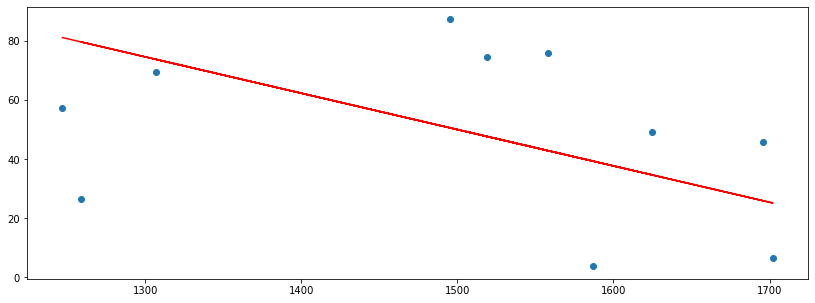

In [27]:
plt.scatter(X_test, y_pred + (y_pred - y_test))
plt.plot(X_test, y_pred, c='r')

In [28]:
clf = LinearRegression()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
# evaluate
mean_absolute_error(y_test, preds) == np.mean(np.abs(y_test - preds))
# get the variance of (absolute) residuals
np.var(np.abs(y_test - preds))
np.var((y_test - preds))

NameError: name 'mean_absolute_error' is not defined

In [ ]:
# Для приемлемых моделей предполагается, что коэффициент детерминации должен быть хотя бы не меньше 50 % 
# У меня 54, если брать test_size=0.1 и 0,5 если взять 0.15 Выше будет отрицательный коэфф.детерминации

In [37]:
South = df.loc[df['location'] =='South'] 
North = df.loc[df['location'] =='North'] 

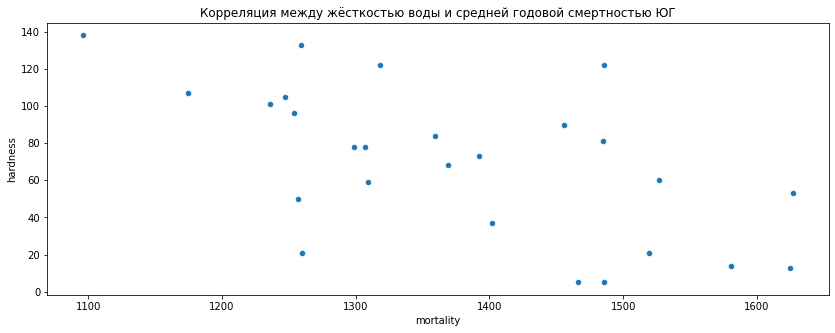

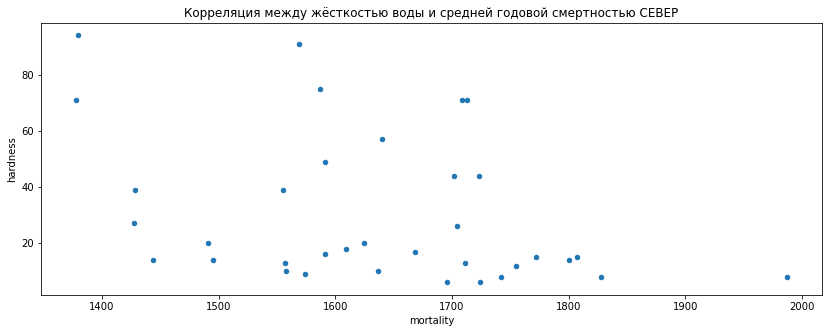

In [38]:
South.plot(kind='scatter', 
        x='mortality', 
        y='hardness', 
        title='Корреляция между жёсткостью воды и средней годовой смертностью ЮГ')
plt.show()
North.plot(kind='scatter', 
        x='mortality', 
        y='hardness', 
        title='Корреляция между жёсткостью воды и средней годовой смертностью СЕВЕР')
plt.show()

In [39]:
South[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [40]:
South[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.440315
hardness,-0.440315,1.000000


In [41]:
North[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [42]:
North[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.283058
hardness,-0.283058,1.000000


In [43]:
#Корреляция у юга выше, чем у северных районов. У севера корреляция слабая

In [44]:
X = South[['mortality']]
y = South['hardness']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
#у меня мало данных, поэтому на проверку беру минимум

In [46]:
X_train.shape

(23, 1)

In [47]:
y_train.shape

(23,)

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([-0.15331453])

In [49]:
model.intercept_

280.396655798216

In [50]:
y_pred = model.predict(X_test)
y_pred

array([78.32810468, 52.57126356, 89.21343634])

In [51]:
model.score(X_test, y_test)

0.4470587433925042

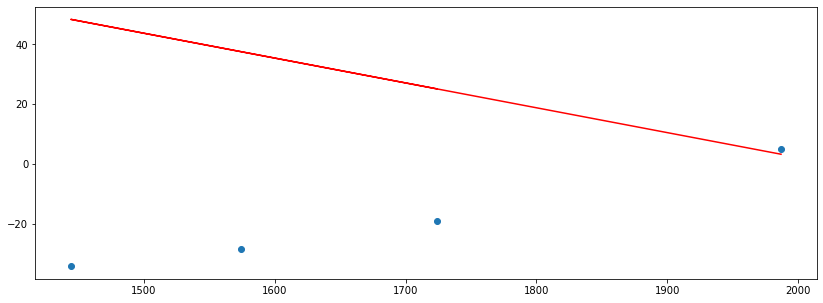

In [69]:
# Остаток, или оценка ошибки еi, представляет собой разность между наблюдаемым (Yi) 
#и предсказанным (Ŷi) значениями зависимой переменной при заданном значении Xi.
#ei = Yi – Ŷi

plt.scatter(X_test, y_test - y_pred)
plt.plot(X_test, y_pred, c='r')

In [53]:
#Нелинейная зависимость, анализ остатков плохой

In [54]:
X = North[['mortality']]
y = North['hardness']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape

(31, 1)

In [56]:
y_train.shape

(31,)

In [57]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [58]:
model.coef_

array([-0.08319223])

In [59]:
model.intercept_

168.50962324709062

In [60]:
y_pred = model.predict(X_test)
y_pred

array([ 3.20666642, 37.56505654, 48.38004617, 25.08622235])

In [61]:
model.score(X_test, y_test)

-67.63913554035241

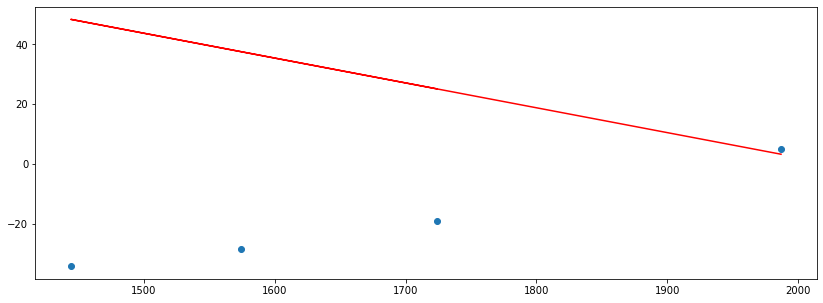

In [70]:
plt.scatter(X_test,y_test - y_pred)
plt.plot(X_test, y_pred, c ='r')

In [64]:
#И у севера и у юга слабый коэффициент детерминации, но ниже делать test_size уже некуда